# Car Price Prediction

In [131]:
# Importing libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

### Loading the data

In [132]:
dataset = pd.read_csv("CarPrice_Assignment.csv")
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [133]:
dataset.shape # checking the shape of our dataset

(205, 26)

<p>We can see that the dataset has 205 rows and 26 columns</p>

In [134]:
dataset.columns # checking the columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Familarity with the dataset

In [135]:
dataset.isna().sum() # checking for missing values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<p>The dataset has no missing values</p>

In [136]:
dataset.nunique() # checking for unique variables

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

The dataset has alot of unique values we can see that the car name has 147 unique values out of 205 columns, carbody has 5 unique values and the rest, this shows that we have a lot of investigation to perfom

In [137]:
dataset.info() # to get the basic information about our column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Here we can see that out of 26 columns we have 10 non-numerical columns

In [138]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


### Descriptive Statistics

- Price: The average car price is 13276.71 and has a standard deviation of of 7988.85 with a minimal value of 5118 and a maximum value of 45400 we have 3rd quantile of 16593

In [139]:
categorical_cols = ["fueltype","aspiration","doornumber","carbody", # getting the name of all categorical columns so as to know their index value
                    "drivewheel","enginelocation","enginetype","cylindernumber",
                    "fuelsystem",]


for column in categorical_cols: # looping through the categorical columns
  print(f"Categories in {column} is: {dataset[column].unique()}")

Categories in fueltype is: ['gas' 'diesel']
Categories in aspiration is: ['std' 'turbo']
Categories in doornumber is: ['two' 'four']
Categories in carbody is: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Categories in drivewheel is: ['rwd' 'fwd' '4wd']
Categories in enginelocation is: ['front' 'rear']
Categories in enginetype is: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Categories in cylindernumber is: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Categories in fuelsystem is: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [140]:
dataset.CarName.unique() # Unique values for carname

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

## Feature Extraction

Since the car name has so many different elements, then we have to extraxt the car brand an model because that is what we have in the car name column

In [141]:
dataset['brand'] = dataset['CarName'].apply(lambda x: x.split(' ')[0]) # this is an annonymous fuction that extract the first index from the carname
dataset['model'] = dataset['CarName'].apply(lambda x: " ".join(x.split(' ')[1:])) # this function extracts every other thing except the first index



In [142]:
dataset["brand"] = dataset["brand"].replace({'vw':'volkswagen', "toyouta":'toyota', # here we are trying to replace misspelled or abbrevaited words
                                             'Nissan':'nissan', 'porcshce':'porsche', 'maxda':'mazda','vokswagen':'volkswagen'})

dataset["model"] = dataset["model"].replace({"100 ls": "100ls"})
dataset["brand"].unique(), dataset['model'].unique()

(array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
        'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
        'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object),
 array(['giulia', 'stelvio', 'Quadrifoglio', '100ls', 'fox', '5000',
        '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4', 'x5',
        'impala', 'monte carlo', 'vega 2300', 'rampage', 'challenger se',
        'd200', 'monaco (sw)', 'colt hardtop', 'colt (sw)',
        'coronet custom', 'dart custom', 'coronet custom (sw)', 'civic',
        'civic cvcc', 'accord cvcc', 'accord lx', 'civic 1500 gl',
        'accord', 'civic 1300', 'prelude', 'civic (auto)', 'MU-X',
        'D-Max ', 'D-Max V-Cross', 'xj', 'xf', 'xk', 'rx3', 'glc deluxe',
        'rx2 coupe', 'rx-4', '626', 'glc', 'rx-7 gs', 'glc 4',
        'glc custom l', 'glc custom', 'electra 225 custom',
        'century luxus (sw)', 'century', 'sk

In [143]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'brand', 'model'],
      dtype='object')

Here we can see that we have the brand and model column added to the dataset, now you will agree with me that is safe to drop the carName and id column since they are irrelevant

In [144]:
data_cleaned = dataset.drop(["CarName", "car_ID"], axis=1)



### Data Visualisation

In [145]:
categorical_cols = ["fueltype","aspiration","doornumber","carbody",
                    "drivewheel","enginelocation","enginetype","cylindernumber",
                    "fuelsystem","model", "brand"]

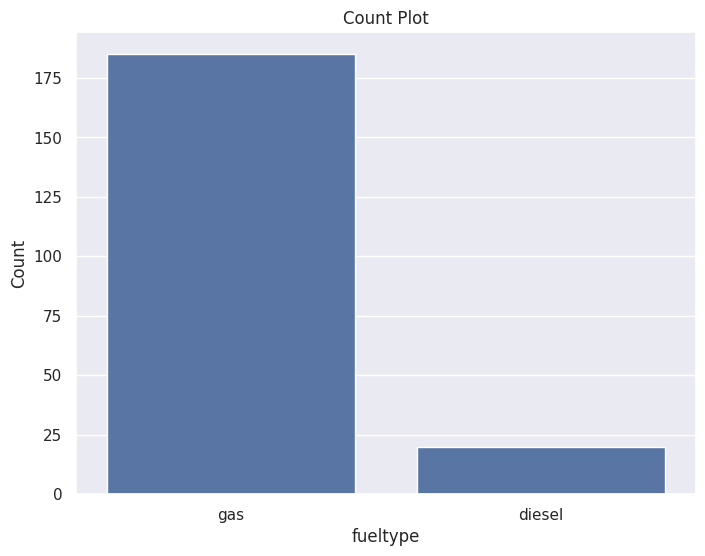

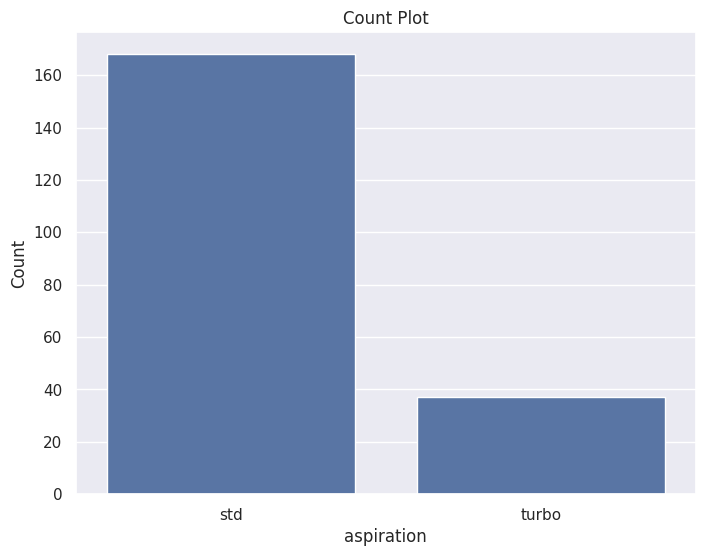

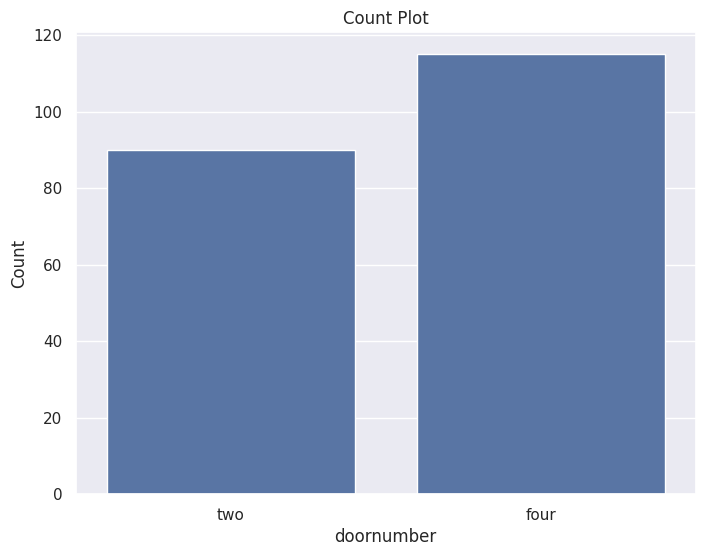

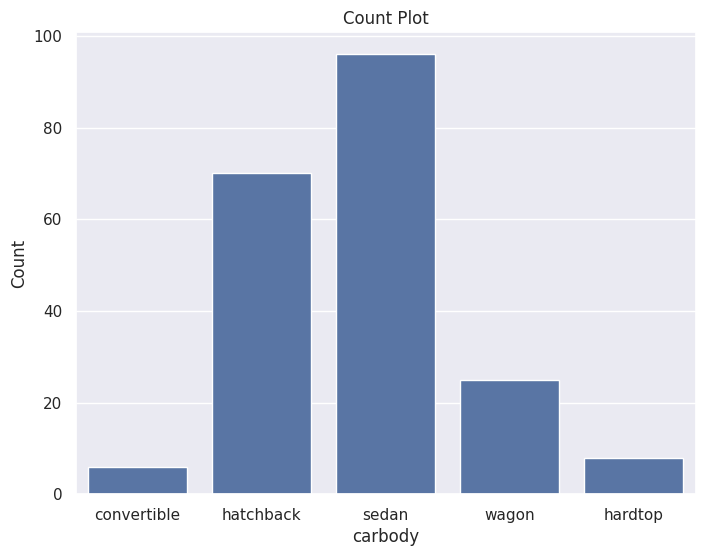

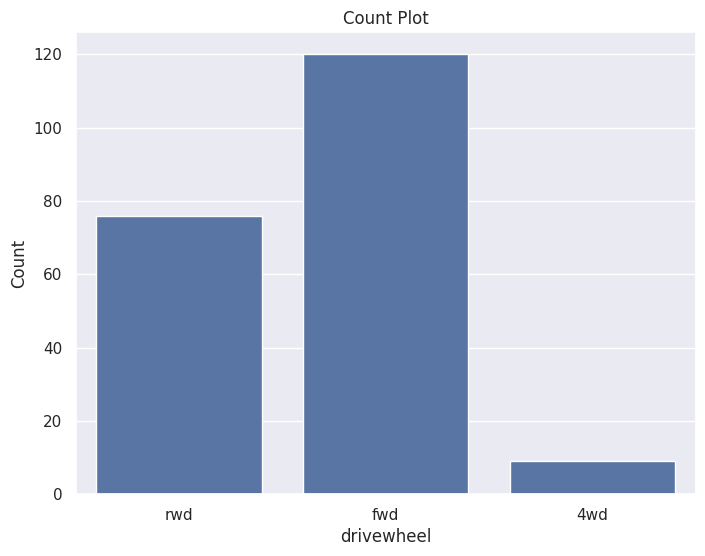

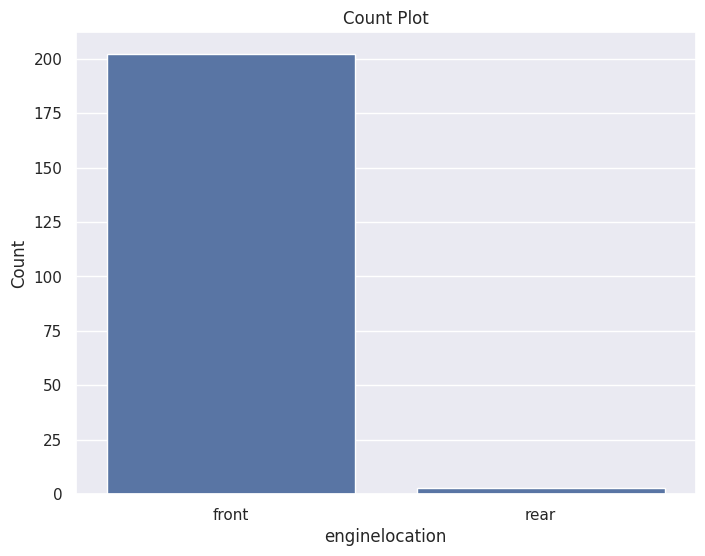

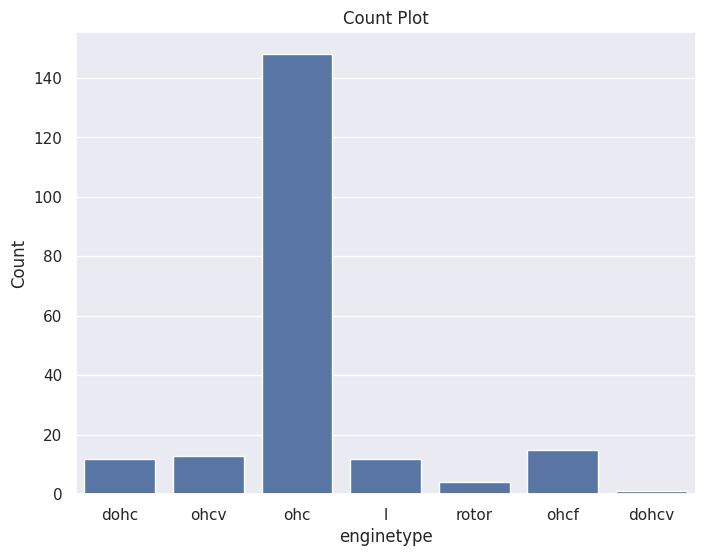

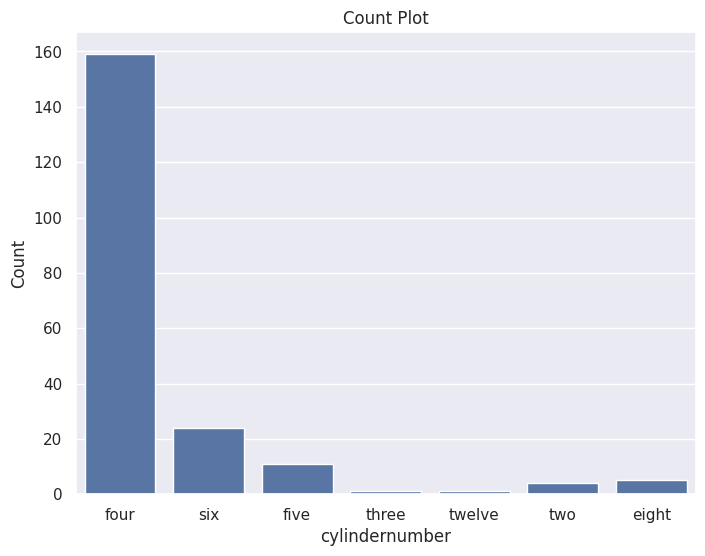

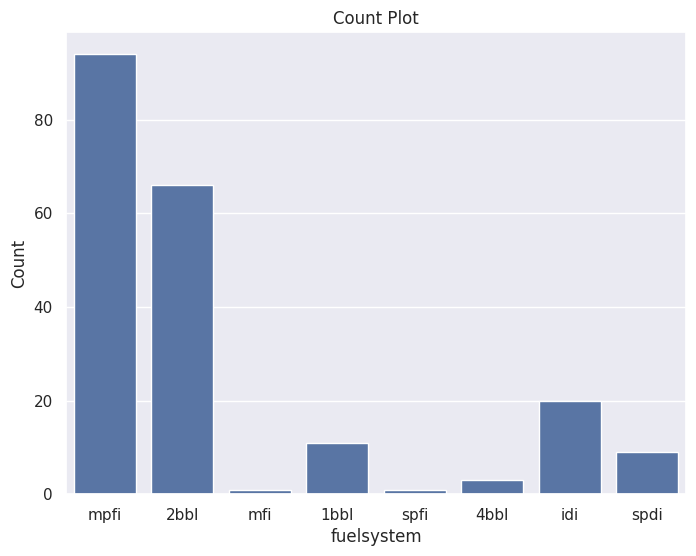

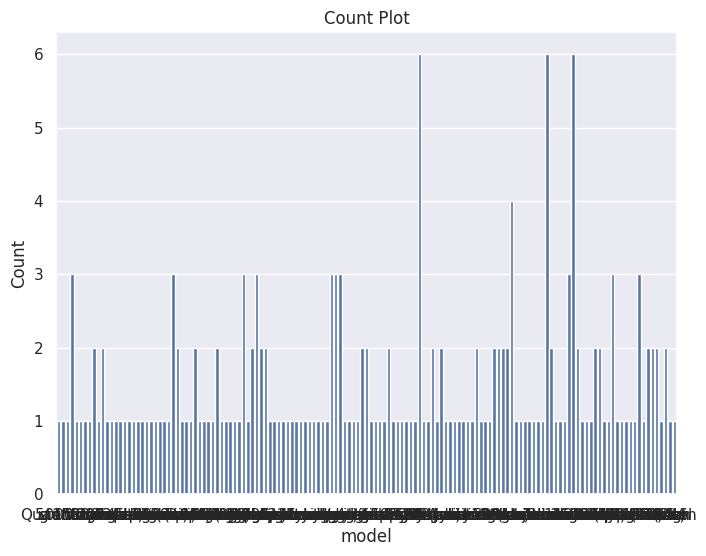

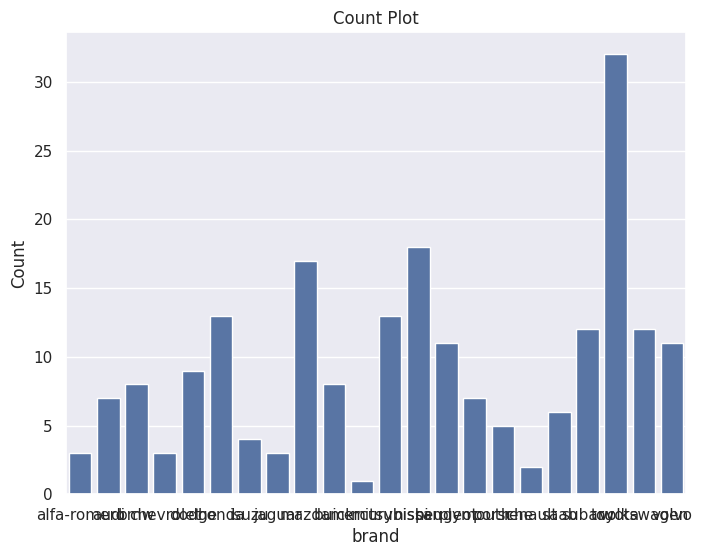

In [146]:
for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=data_cleaned)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Count Plot')
    plt.show()

We can see how the categorcal data are using the count plot, the data is not balanced, however we will not perform downsampling because out dataset is is low just 205 rows, you can upsample but for this project we will work with it like this

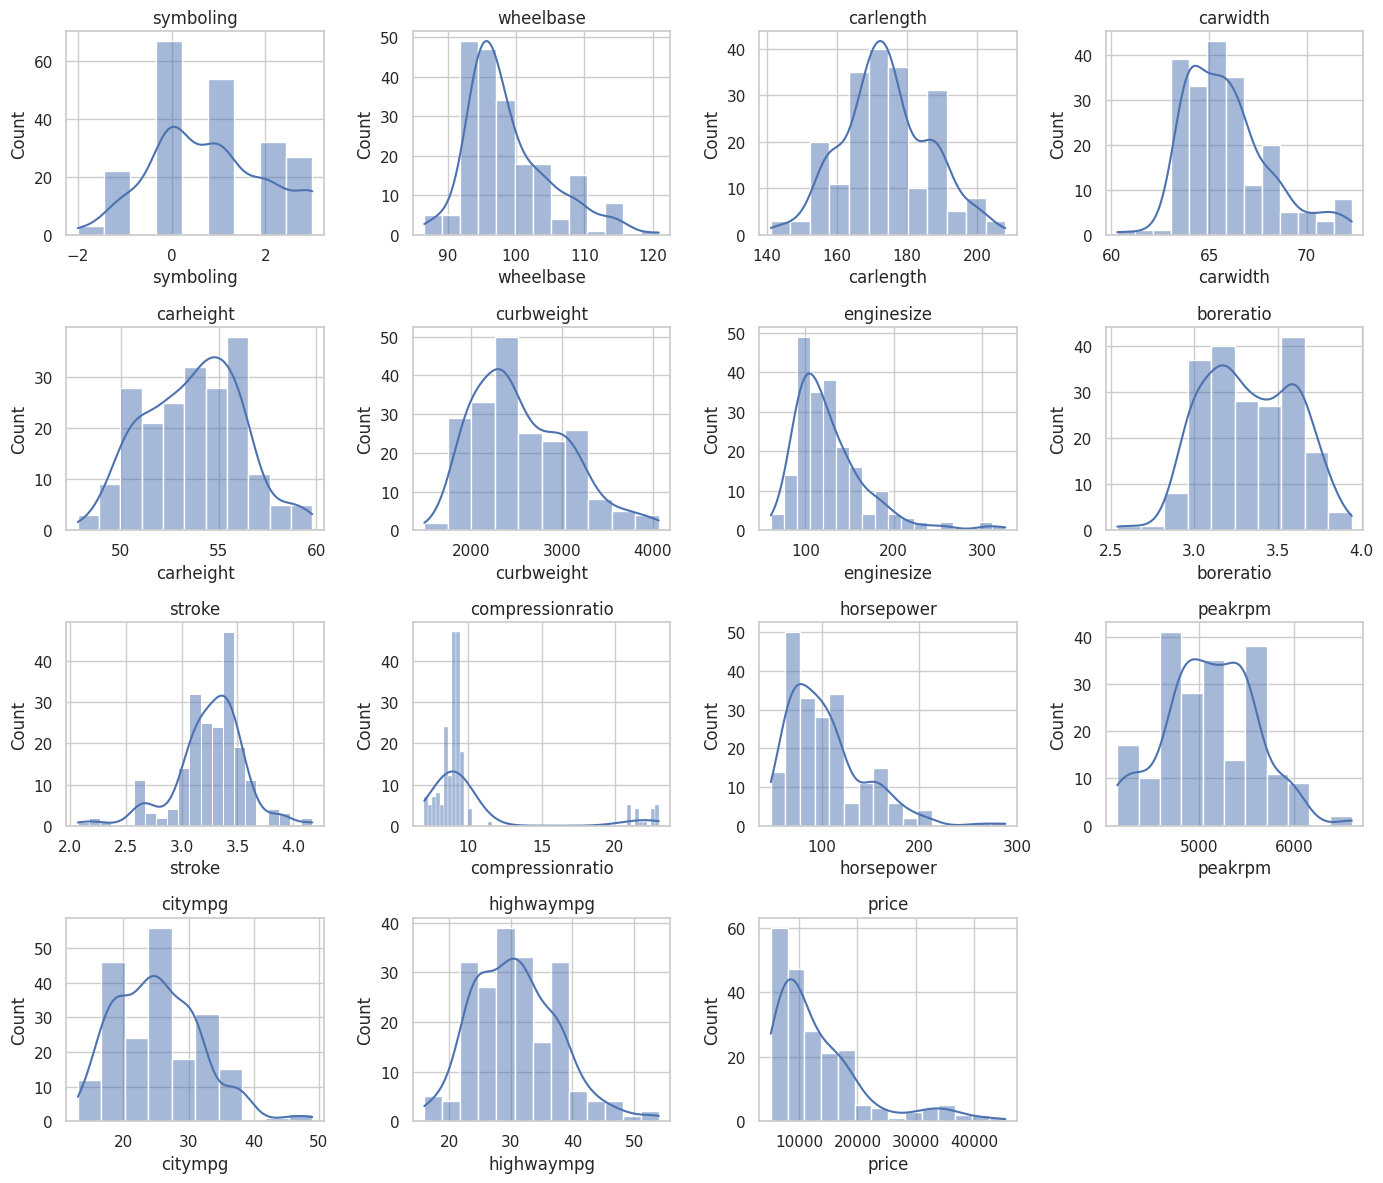

In [147]:
numerical_cols = ["symboling","wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio",
                  "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]

num_cols = len(numerical_cols)

num_rows = (num_cols + 3) // 4
# Set the style of the plots
sns.set(style="whitegrid")

# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(14, 3 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the numerical columns and plot the distribution for each
for i, col in enumerate(numerical_cols):
    sns.histplot(data_cleaned[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

# Hide extra subplots if any
for j in range(num_cols, num_rows * 4):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


We can see that the majoority of our data has normal distribution except for price, horsepower compresssion ratio an enginsize

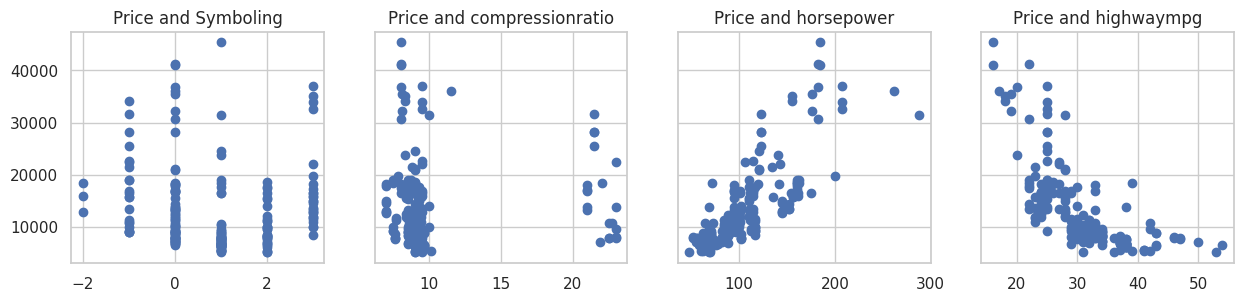

In [148]:
f, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['symboling'],data_cleaned['price'])
ax1.set_title('Price and Symboling')
ax2.scatter(data_cleaned['compressionratio'],data_cleaned['price'])
ax2.set_title('Price and compressionratio')
ax3.scatter(data_cleaned['horsepower'],data_cleaned['price'])
ax3.set_title('Price and horsepower')
ax4.scatter(data_cleaned['highwaympg'],data_cleaned['price'])
ax4.set_title('Price and highwaympg')

plt.show()

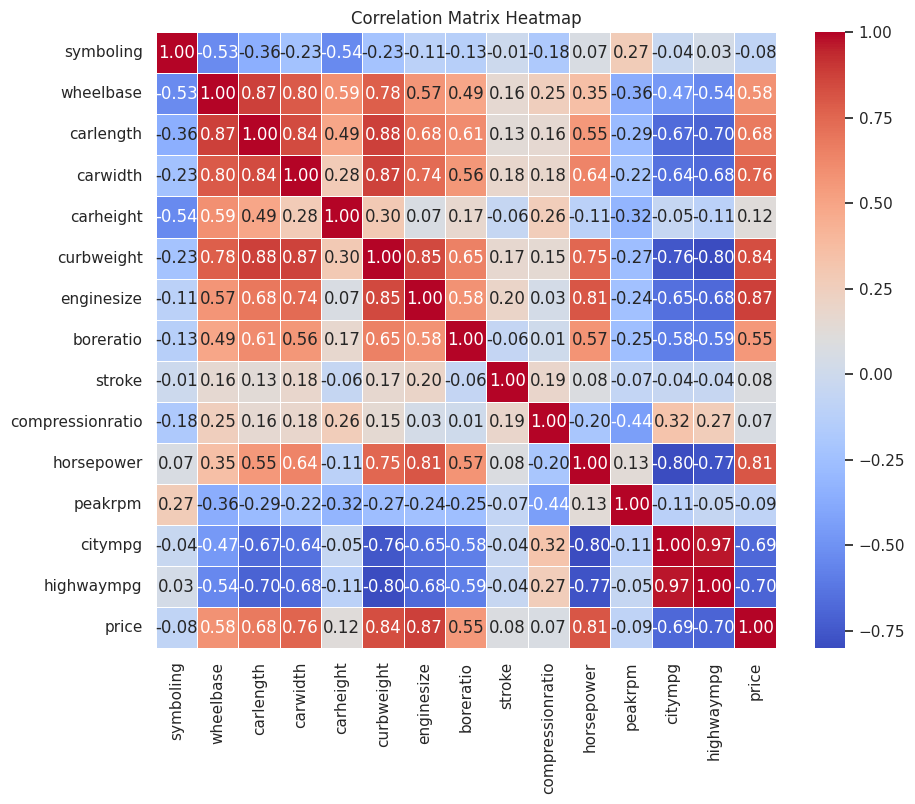

In [149]:
corr_matrix = data_cleaned[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show();

Here we can see that there is high correlation between most of the variables, now the idea of correlation is that, if two values are highly correlated that means that one value can be used to predict the other therefore no need keeping both values, we will further investigate this using Variance Inflation factor 👮🏿‍♀️👨🏿‍💻

In [150]:
gas_fueltype = data_cleaned[data_cleaned.fueltype == "gas"]
diesel_fueltype = data_cleaned[data_cleaned.fueltype  == "diesel"]

In [151]:
len(gas_fueltype), len(diesel_fueltype)

(185, 20)

In [152]:
gas_fueltype.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,185.0,0.913514,1.248077,-2.00,0.00,1.000,2.00,3.00
wheelbase,185.0,98.147568,5.613203,86.60,94.50,96.500,100.40,120.90
carlength,185.0,173.188649,12.146825,141.10,166.30,172.600,178.50,208.10
carwidth,185.0,65.743243,2.073558,60.30,64.00,65.400,66.50,72.30
carheight,185.0,53.496757,2.409422,47.80,51.60,53.700,55.40,59.80
curbweight,185.0,2518.459459,501.000249,1488.00,2128.00,2405.000,2847.00,4066.00
enginesize,185.0,125.956757,42.506371,61.00,97.00,111.000,141.00,326.00
boreratio,185.0,3.324919,0.269595,2.54,3.15,3.310,3.58,3.94
stroke,185.0,3.230541,0.318475,2.07,3.10,3.255,3.40,4.17
compressionratio,185.0,8.860108,0.690242,7.00,8.50,9.000,9.40,11.50


We can see that the average price for gas cars is $12999, with a min of 5118 and a max of 45000

In [153]:
diesel_fueltype.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,20.0,0.1000,0.967906,-1.00,-0.250,0.000,0.000,2.00
wheelbase,20.0,104.3900,6.869452,94.50,97.300,105.800,109.325,115.60
carlength,20.0,182.0100,11.465596,165.30,171.700,183.450,189.325,202.60
carwidth,20.0,67.4300,2.251339,63.80,65.500,67.650,68.525,71.70
carheight,20.0,55.8350,1.641333,52.80,54.900,55.700,56.700,58.70
curbweight,20.0,2898.8000,585.386026,2017.00,2308.000,2948.500,3443.750,3770.00
enginesize,20.0,135.7000,32.115089,97.00,108.250,139.500,152.000,183.00
boreratio,20.0,3.3745,0.285334,2.99,3.010,3.410,3.610,3.70
stroke,20.0,3.4855,0.109134,3.35,3.400,3.495,3.550,3.64
compressionratio,20.0,22.0050,0.802939,21.00,21.375,21.950,22.775,23.00


The average for diesel cars is $15000 a bit higher than the gas cars

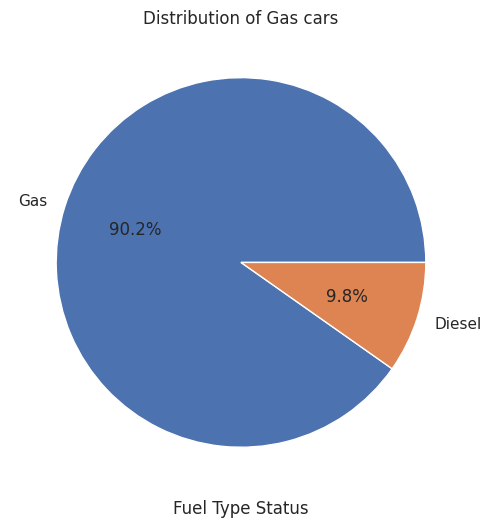

In [154]:
value_counts = data_cleaned['fueltype'].value_counts()

# Plotting the pie chart using Seaborn
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.title('Distribution of Gas cars')
sns.set_palette('pastel')  # Set color palette
plt.pie(value_counts, labels=['Gas', 'Diesel'], autopct='%1.1f%%')
plt.xlabel('Fuel Type Status')
plt.show()

In [155]:
data_cleaned.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

Now we can clearly see that th 4wd was an abbreviation of fwd so we will replace it

In [156]:
data_cleaned["drivewheel"] = data_cleaned.drivewheel.replace({"4wd": "fwd"})

data_cleaned.drivewheel.value_counts()

fwd    129
rwd     76
Name: drivewheel, dtype: int64

In [157]:
data_cleaned[data_cleaned.drivewheel == "fwd"].describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,129.0,0.906977,1.049121,-1.00,0.00,1.00,2.00,3.00
wheelbase,129.0,96.456589,3.196381,86.60,94.50,96.10,97.30,105.80
carlength,129.0,168.963566,10.254016,141.10,159.10,171.70,175.40,192.70
carwidth,129.0,65.068217,1.561199,60.30,63.80,65.20,66.30,71.40
carheight,129.0,53.650388,2.215292,49.40,52.00,53.90,55.10,59.80
curbweight,129.0,2288.457364,341.778551,1488.00,2008.00,2275.00,2455.00,3296.00
enginesize,129.0,108.875969,19.857700,61.00,92.00,108.00,121.00,181.00
boreratio,129.0,3.210698,0.224994,2.54,3.03,3.17,3.35,3.62
stroke,129.0,3.260775,0.304463,2.07,3.11,3.35,3.41,3.90
compressionratio,129.0,9.822636,3.591968,7.00,8.60,9.00,9.40,23.00


In [158]:
data_cleaned[data_cleaned.drivewheel == "rwd"].describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,76.0,0.710526,1.521541,-2.00,0.0000,0.00,2.0000,3.00
wheelbase,76.0,102.660526,7.526789,88.60,95.9750,103.50,107.9250,120.90
carlength,76.0,182.681579,10.703429,168.70,173.0500,185.10,188.8000,208.10
carwidth,76.0,67.332895,2.255446,61.80,65.6000,67.20,68.4000,72.30
carheight,76.0,53.851316,2.799881,47.80,52.0000,54.30,56.2250,58.70
curbweight,76.0,3008.947368,455.017594,2169.00,2707.5000,3027.00,3235.5000,4066.00
enginesize,76.0,157.513158,50.352489,70.00,130.0000,146.00,181.0000,326.00
boreratio,76.0,3.531842,0.217646,2.68,3.4300,3.58,3.7000,3.94
stroke,76.0,3.246316,0.330387,2.19,3.1175,3.23,3.4775,4.17
compressionratio,76.0,10.685526,4.518752,7.00,8.4000,9.20,9.5000,23.00


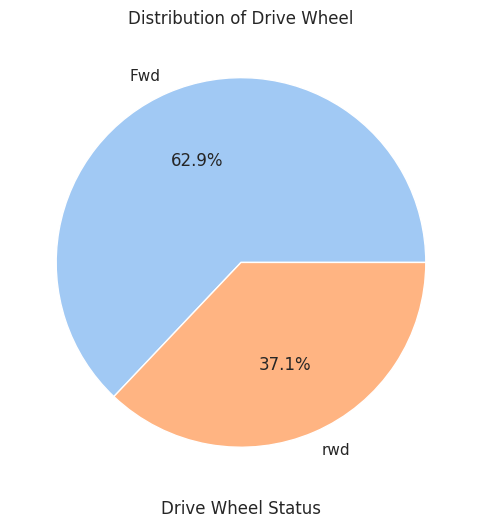

In [159]:
value_counts = data_cleaned.drivewheel.value_counts()

# Plotting the pie chart using Seaborn
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.title('Distribution of Drive Wheel')
sns.set_palette('pastel')  # Set color palette
plt.pie(value_counts, labels=['Fwd', 'rwd'], autopct='%1.1f%%')
plt.xlabel('Drive Wheel Status')
plt.show()

In [160]:
data_cleaned.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [161]:
data_cleaned[data_cleaned.doornumber == "four"].describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,115.0,0.104348,0.901985,-2.00,0.00,0.00,1.000,2.00
wheelbase,115.0,101.133913,6.264252,93.10,96.30,99.10,104.700,120.90
carlength,115.0,178.388696,11.546001,155.90,171.70,175.60,187.800,208.10
carwidth,115.0,66.300000,2.184957,61.80,64.50,66.20,67.200,71.70
carheight,115.0,54.915652,2.080173,50.60,53.70,55.10,56.100,59.80
curbweight,115.0,2646.260870,523.406589,1909.00,2277.50,2465.00,3057.500,4066.00
enginesize,115.0,127.669565,37.803908,90.00,108.00,120.00,141.000,308.00
boreratio,115.0,3.358261,0.250331,2.91,3.17,3.33,3.615,3.80
stroke,115.0,3.252348,0.315415,2.19,3.15,3.29,3.405,4.17
compressionratio,115.0,10.766087,4.732806,7.00,8.50,9.00,9.450,23.00


In [162]:
data_cleaned[data_cleaned.doornumber == "two"].describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,90.0,1.766667,0.972082,0.00,1.000,2.000,3.00,3.00
wheelbase,90.0,95.718889,4.027319,86.60,93.700,95.200,98.40,112.00
carlength,90.0,168.504444,11.077175,141.10,158.800,168.900,176.20,199.20
carwidth,90.0,65.406667,1.995095,60.30,63.925,65.100,66.30,72.30
carheight,90.0,52.203333,1.992483,47.80,50.800,52.000,53.70,56.10
curbweight,90.0,2439.677778,496.284528,1488.00,2019.750,2375.000,2772.50,3950.00
enginesize,90.0,125.933333,46.287523,61.00,93.250,109.500,146.00,326.00
boreratio,90.0,3.293333,0.292375,2.54,3.030,3.255,3.57,3.94
stroke,90.0,3.259333,0.312979,2.07,3.110,3.280,3.41,3.90
compressionratio,90.0,9.345778,2.515444,7.00,8.700,9.150,9.40,23.00


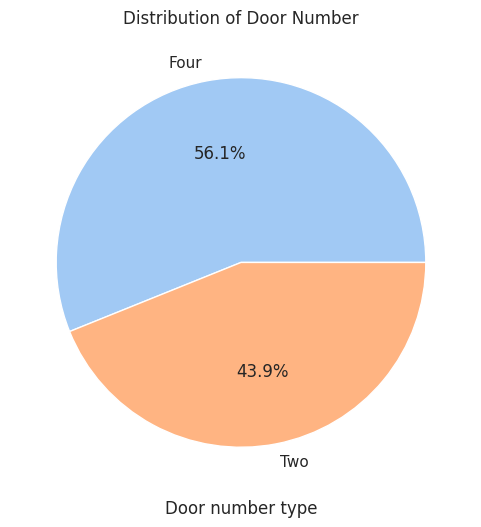

In [163]:
value_counts = data_cleaned['doornumber'].value_counts()

# Plotting the pie chart using Seaborn
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.title('Distribution of Door Number')
sns.set_palette('pastel')  # Set color palette
plt.pie(value_counts, labels=['Four', 'Two'], autopct='%1.1f%%')
plt.xlabel('Door number type')
plt.show()

In [164]:
data_cleaned.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

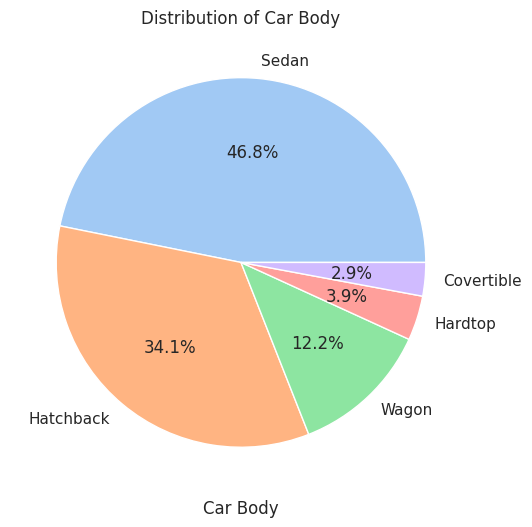

In [165]:
value_counts = data_cleaned['carbody'].value_counts()

# Plotting the pie chart using Seaborn
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.title('Distribution of Car Body')
sns.set_palette('pastel')  # Set color palette
plt.pie(value_counts, labels=['Sedan', 'Hatchback', "Wagon", "Hardtop","Covertible"], autopct='%1.1f%%')
plt.xlabel('Car Body')
plt.show()

In [166]:
data_cleaned.brand.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: brand, dtype: int64

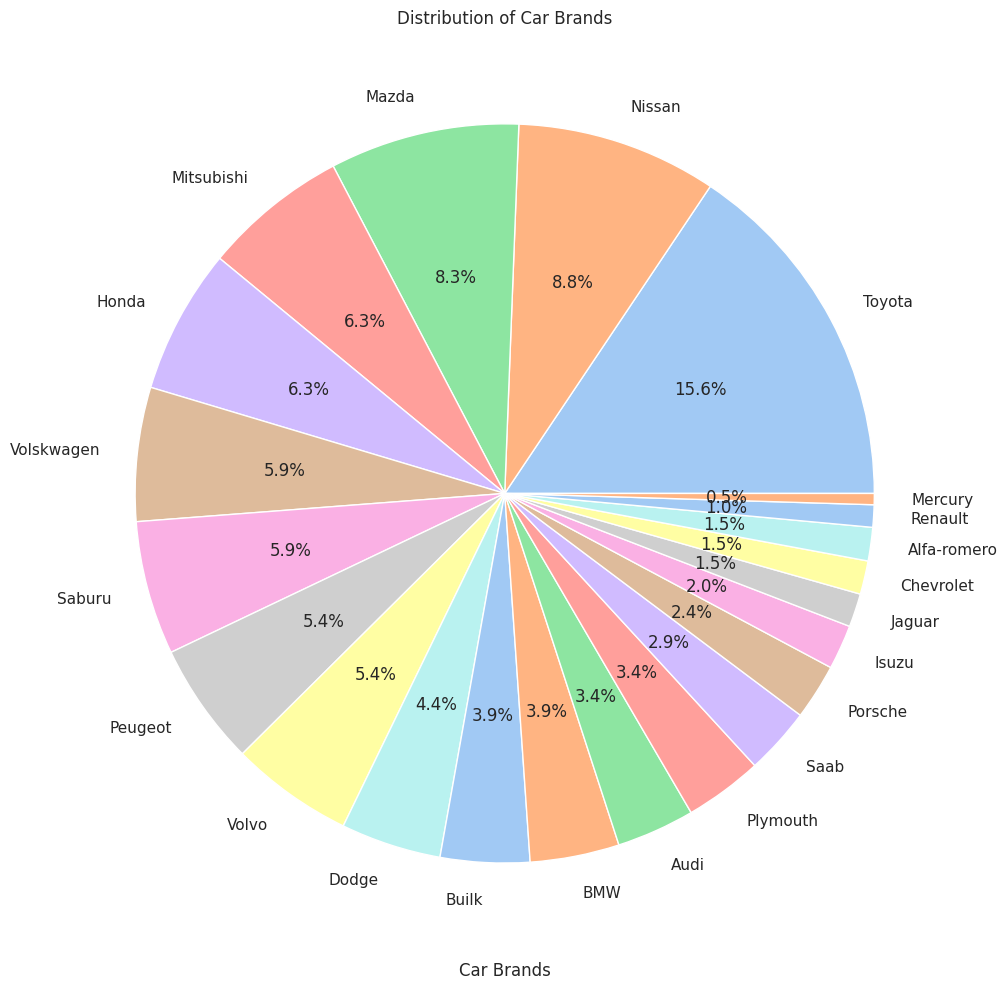

In [167]:
value_counts = data_cleaned['brand'].value_counts()

# Plotting the pie chart using Seaborn
plt.figure(figsize=(12, 12))  # Adjust the figure size if needed
plt.title('Distribution of Car Brands')
sns.set_palette('pastel')  # Set color palette
plt.pie(value_counts, labels=['Toyota', 'Nissan', "Mazda", "Mitsubishi","Honda", "Volskwagen", "Saburu", "Peugeot", "Volvo", "Dodge", "Builk",
                              "BMW", "Audi", "Plymouth", "Saab", "Porsche", "Isuzu", "Jaguar", "Chevrolet", "Alfa-romero", "Renault", "Mercury"], autopct='%1.1f%%')
plt.xlabel('Car Brands')
plt.show()

We can see that Toyota is popular among users followed by Nissan and then Mazda

### Checking for multicollinearity

In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[numerical_cols]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns


In [169]:
vif

,VIF,Features
0,2.543383,symboling
1,2296.810858,wheelbase
2,1919.961993,carlength
3,2832.341655,carwidth
4,929.478701,carheight
5,408.755795,curbweight
6,93.014977,enginesize
7,296.762154,boreratio
8,139.767452,stroke
9,17.277978,compressionratio


🥶😱 We can see that the VIF values for some of our variables are so high, a good vif is between 1 and 5 however some statistician recommend not more than 10. So for this project we will set it to >= 1 <= 10

In [170]:
numerical = ['symboling', # here we will remove all the variables that have a high vif value. Please know that this was achieved after many trials
 'compressionratio',
 'horsepower',
 'highwaympg']

In [171]:
variables = data_cleaned[numerical]
vif_1 = pd.DataFrame()
vif_1["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif_1["Features"] = variables.columns

In [172]:
vif_1

,VIF,Features
0,1.541197,symboling
1,8.335205,compressionratio
2,4.153183,horsepower
3,9.137948,highwaympg


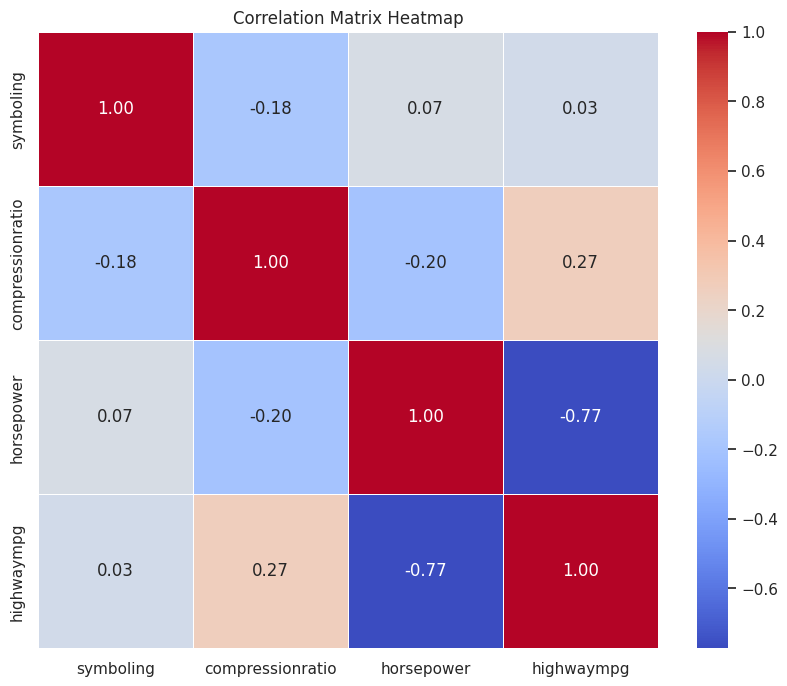

In [173]:
corr_matrix = data_cleaned[numerical].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show();

🥰😎 This is very beautiful, we can see that our correlation matrix values has drastically reduced. So we will work with these variables

In [174]:
data_cleaned

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100ls
4,2,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [175]:
data_cleaned.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
brand                object
model                object
dtype: object

In [176]:
model_columns = ['symboling',
                'compressionratio',
                'horsepower',
                  'highwaympg', "fueltype",'aspiration', 'doornumber', 'carbody','drivewheel','enginelocation',
                      'brand',"enginetype","cylindernumber","fuelsystem","price"]


first_model_data = data_cleaned[model_columns] # subsetting our dataset with the vif variables


first_model_data

,symboling,compressionratio,horsepower,highwaympg,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,brand,enginetype,cylindernumber,fuelsystem,price
0,3,9.0,111,27,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi,13495.0
1,3,9.0,111,27,gas,std,two,convertible,rwd,front,alfa-romero,dohc,four,mpfi,16500.0
2,1,9.0,154,26,gas,std,two,hatchback,rwd,front,alfa-romero,ohcv,six,mpfi,16500.0
3,2,10.0,102,30,gas,std,four,sedan,fwd,front,audi,ohc,four,mpfi,13950.0
4,2,8.0,115,22,gas,std,four,sedan,fwd,front,audi,ohc,five,mpfi,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,9.5,114,28,gas,std,four,sedan,rwd,front,volvo,ohc,four,mpfi,16845.0
201,-1,8.7,160,25,gas,turbo,four,sedan,rwd,front,volvo,ohc,four,mpfi,19045.0
202,-1,8.8,134,23,gas,std,four,sedan,rwd,front,volvo,ohcv,six,mpfi,21485.0
203,-1,23.0,106,27,diesel,turbo,four,sedan,rwd,front,volvo,ohc,six,idi,22470.0


### Data preprocessing

In [177]:
first_model_data.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [178]:
first_model_data = first_model_data.rename(columns={"fueltype":"fueltype_gas"}) #renaming the column so that when we see 1 which means fuel system is gas

first_model_data.fueltype_gas = first_model_data.fueltype_gas.replace({"gas":1, "diesel":0})

first_model_data.fueltype_gas.value_counts()

1    185
0     20
Name: fueltype_gas, dtype: int64

In [179]:
first_model_data.doornumber = first_model_data.doornumber.replace({"two":2, "four":4})

first_model_data.doornumber.value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [180]:
first_model_data = first_model_data.rename(columns={"aspiration":"aspiration_std"})


first_model_data.aspiration_std = first_model_data.aspiration_std.replace({"std":1, "turbo":0})

first_model_data.aspiration_std.value_counts()

1    168
0     37
Name: aspiration_std, dtype: int64

In [181]:
first_model_data = first_model_data.rename(columns={"drivewheel":"drivewheel_fwd"})


first_model_data.drivewheel_fwd = first_model_data.drivewheel_fwd.replace({"fwd":1, "rwd":0})

first_model_data.drivewheel_fwd.value_counts()

1    129
0     76
Name: drivewheel_fwd, dtype: int64

In [182]:
first_model_data = first_model_data.rename(columns={"drivewheel":"drivewheel_fwd"})


first_model_data.drivewheel_fwd = first_model_data.drivewheel_fwd.replace({"fwd":1, "rwd":0})

first_model_data.drivewheel_fwd.value_counts()

1    129
0     76
Name: drivewheel_fwd, dtype: int64

Here we have completed numerical conversion of  the binary categorical variables

In [183]:
first_model_data.dtypes

symboling             int64
compressionratio    float64
horsepower            int64
highwaympg            int64
fueltype_gas          int64
aspiration_std        int64
doornumber            int64
carbody              object
drivewheel_fwd        int64
enginelocation       object
brand                object
enginetype           object
cylindernumber       object
fuelsystem           object
price               float64
dtype: object

In [184]:
data_with_dummies = pd.get_dummies(first_model_data, drop_first=True) # drop first making sure we have n-1 for the dummies

data_with_dummies

,symboling,compressionratio,horsepower,highwaympg,fueltype_gas,aspiration_std,doornumber,drivewheel_fwd,price,carbody_hardtop,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,9.0,111,27,1,1,2,0,13495.0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,9.0,111,27,1,1,2,0,16500.0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,9.0,154,26,1,1,2,0,16500.0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,10.0,102,30,1,1,4,1,13950.0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,8.0,115,22,1,1,4,1,17450.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,9.5,114,28,1,1,4,0,16845.0,0,...,0,0,0,0,0,0,0,1,0,0
201,-1,8.7,160,25,1,0,4,0,19045.0,0,...,0,0,0,0,0,0,0,1,0,0
202,-1,8.8,134,23,1,1,4,0,21485.0,0,...,0,0,0,0,0,0,0,1,0,0
203,-1,23.0,106,27,0,0,4,0,22470.0,0,...,0,0,0,0,0,1,0,0,0,0


In [185]:
first_model_data.shape, data_with_dummies.shape

((205, 15), (205, 54))

#### Rearranging the columns a bit

In [186]:
cols =['symboling', 'compressionratio', 'horsepower', 'highwaympg',
       'fueltype_gas', 'aspiration_std', 'doornumber', 'drivewheel_fwd', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginelocation_rear', 'brand_audi', 'brand_bmw',
       'brand_buick', 'brand_chevrolet', 'brand_dodge', 'brand_honda',
       'brand_isuzu', 'brand_jaguar', 'brand_mazda', 'brand_mercury',
       'brand_mitsubishi', 'brand_nissan', 'brand_peugeot', 'brand_plymouth',
       'brand_porsche', 'brand_renault', 'brand_saab', 'brand_subaru',
       'brand_toyota', 'brand_volkswagen', 'brand_volvo', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi',
       'price']


In [187]:
clean_data = data_with_dummies[cols]
clean_data

,symboling,compressionratio,horsepower,highwaympg,fueltype_gas,aspiration_std,doornumber,drivewheel_fwd,carbody_hardtop,carbody_hatchback,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
0,3,9.0,111,27,1,1,2,0,0,0,...,0,0,0,0,0,0,1,0,0,13495.0
1,3,9.0,111,27,1,1,2,0,0,0,...,0,0,0,0,0,0,1,0,0,16500.0
2,1,9.0,154,26,1,1,2,0,0,1,...,0,0,0,0,0,0,1,0,0,16500.0
3,2,10.0,102,30,1,1,4,1,0,0,...,0,0,0,0,0,0,1,0,0,13950.0
4,2,8.0,115,22,1,1,4,1,0,0,...,0,0,0,0,0,0,1,0,0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,9.5,114,28,1,1,4,0,0,0,...,0,0,0,0,0,0,1,0,0,16845.0
201,-1,8.7,160,25,1,0,4,0,0,0,...,0,0,0,0,0,0,1,0,0,19045.0
202,-1,8.8,134,23,1,1,4,0,0,0,...,0,0,0,0,0,0,1,0,0,21485.0
203,-1,23.0,106,27,0,0,4,0,0,0,...,0,0,0,0,1,0,0,0,0,22470.0


### Splitting the dataset into features and target

In [188]:
X = clean_data.iloc[:, :-1].values
y = clean_data.iloc[:, -1].values

In [189]:
# using the the train_test_split split our data into 80/20 for training data and test data

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=50) # setting a random state to make sure our data is reproducible


It is important to split the data before scaling to avoid information leakage, and since we have some features that are enconded data we performed scaling on the normal features, because if we perform on the encoded features the maning will be lost

In [190]:


scaler = StandardScaler()
scaler.fit(X_train[:, :4]) # subsetting only the features we want to scale

StandardScaler()

In [191]:
X_train[:, :4] = scaler.transform(X_train[:, :4])
X_test[:, :4] = scaler.transform(X_test[:, :4]) # just transforming the test data

### Linear Regression

In [192]:
# Instantiating the LinearRegression
reg = LinearRegression()

# Fitting the data
reg.fit(X_train,y_train)

#Predicting on X_test, which is unseen
y_hat = reg.predict(X_test)

#calculating the r^2 score
lr_score = r2_score(y_test, y_hat)
lr_score

0.9206619328879393

### Random Forest

In [193]:
# Instantiating the RandomforestRegressor
rf = RandomForestRegressor()

# Fitting the data
rf.fit(X_train, y_train)

#Predicting on X_test, which is unseen
y_pred_rf = rf.predict(X_test)

#calculating the r^2 score
rf_score = r2_score(y_test,y_pred_rf)

rf_score

0.9251670306114077

### XGBoostRegressor

In [194]:
# Instantiating the XGBRegressor
xgb = XGBRegressor()

# Fitting the data
xgb.fit(X_train, y_train)

#Predicting on X_test, which is unseen
y_pred = xgb.predict(X_test)

#calculating the r^2 score
xgb_score = r2_score(y_test, y_pred)

xgb_score

0.9123363474759821

Now lets compare the predicted and actual values of the target variable

In [202]:
pred_actu_diff = pd.DataFrame(y_pred, columns=["Predictions"])

pred_actu_diff.head()

,Predictions
0,12454.704102
1,8461.282227
2,21544.316406
3,40261.738281
4,10555.608398


In [203]:
pred_actu_diff["Actual Values"] = y_test
pred_actu_diff.head()

,Predictions,Actual Values
0,12454.704102,16695.0
1,8461.282227,11199.0
2,21544.316406,20970.0
3,40261.738281,40960.0
4,10555.608398,11259.0


In [205]:
pred_actu_diff["Residual"] = pred_actu_diff["Predictions"] - pred_actu_diff["Actual Values"]

pred_actu_diff.head()

,Predictions,Actual Values,Residual
0,12454.704102,16695.0,-4240.295898
1,8461.282227,11199.0,-2737.717773
2,21544.316406,20970.0,574.316406
3,40261.738281,40960.0,-698.261719
4,10555.608398,11259.0,-703.391602


In [212]:
pred_actu_diff["Difference %"] = np.absolute(pred_actu_diff["Residual"] / pred_actu_diff["Actual Values"] * 100)


,Predictions,Actual Values,Residual,Difference %
0,12454.70,16695.00,-4240.30,25.40
1,8461.28,11199.00,-2737.72,24.45
2,21544.32,20970.00,574.32,2.74
3,40261.74,40960.00,-698.26,1.70
4,10555.61,11259.00,-703.39,6.25
5,7353.15,6575.00,778.15,11.83
6,16561.68,11900.00,4661.68,39.17
7,22822.57,23875.00,-1052.43,4.41
8,10249.64,8845.00,1404.64,15.88
9,6986.77,5499.00,1487.77,27.06


In [213]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pred_actu_diff.sort_values(by=['Difference %']) # sorting

,Predictions,Actual Values,Residual,Difference %
17,7973.20,7957.00,16.20,0.20
15,9599.67,9549.00,50.67,0.53
39,8564.29,8499.00,65.29,0.77
34,5648.68,5572.00,76.68,1.38
3,40261.74,40960.00,-698.26,1.70
21,14474.43,14869.00,-394.57,2.65
12,27425.70,28176.00,-750.30,2.66
2,21544.32,20970.00,574.32,2.74
23,16552.44,15998.00,554.44,3.47
31,8713.00,8358.00,355.00,4.25


In [214]:
pred_actu_diff.describe()

,Predictions,Actual Values,Residual,Difference %
count,41.00,41.00,41.00,41.00
mean,11726.81,11641.39,85.42,13.35
std,6799.23,6873.95,2033.40,13.13
min,5648.68,5118.00,-4240.30,0.20
25%,7359.48,7788.00,-750.30,4.41
50%,9329.74,9298.00,16.20,9.54
75%,14474.43,13200.00,778.15,20.75
max,40261.74,40960.00,6378.19,68.60


## The END 👨🏿‍💻😋

This is very beautiful hope you picked up one or two from this ❤️